In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#loading the california house pricing Dataset
from sklearn.datasets import fetch_california_housing

In [7]:
housing = fetch_california_housing()

In [11]:
type(housing)

sklearn.utils._bunch.Bunch

In [13]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [16]:
#description
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [17]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [22]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [18]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [19]:
print(housing.target_names)

['MedHouseVal']


In [20]:
print(housing.frame)

None


In [33]:
#preparing the dataset
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [34]:
df['Price'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [36]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [48]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


In [85]:
#Visualization and analysis of the data

In [88]:
#gives correleation btw the features
#1: Perfect positive correlation (as one variable increases, the other increases proportionally).
#0: No linear correlation (no linear relationship between the variables).
#-1: Perfect negative correlation (as one variable increases, the other decreases proportionally).


In [89]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


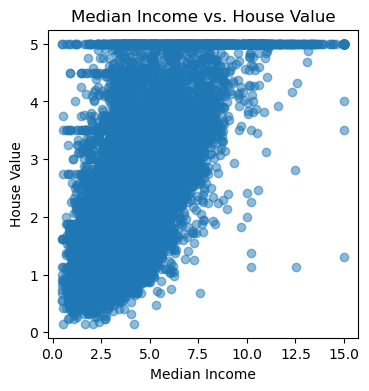

In [58]:
plt.figure(figsize=(4,4))
plt.scatter(df['MedInc'], df['Price'], alpha=0.5)
plt.title('Median Income vs. House Value')
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.show()

In [59]:
import seaborn as sns
#sns.pairplot(df)

<Axes: xlabel='AveBedrms', ylabel='Price'>

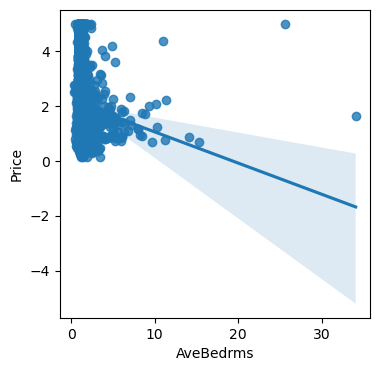

In [67]:
plt.figure(figsize=(4, 4))
sns.regplot(x="AveBedrms", y="Price", data=df)

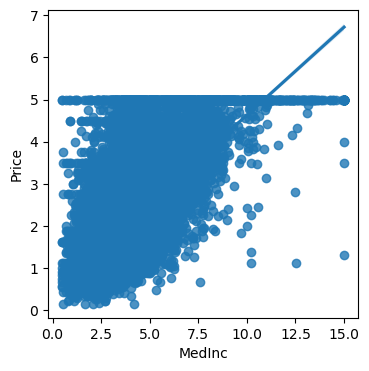

In [64]:
plt.figure(figsize=(4, 4)) 
# Create the regression plot
sns.regplot(x="MedInc", y="Price", data=df)
plt.show()

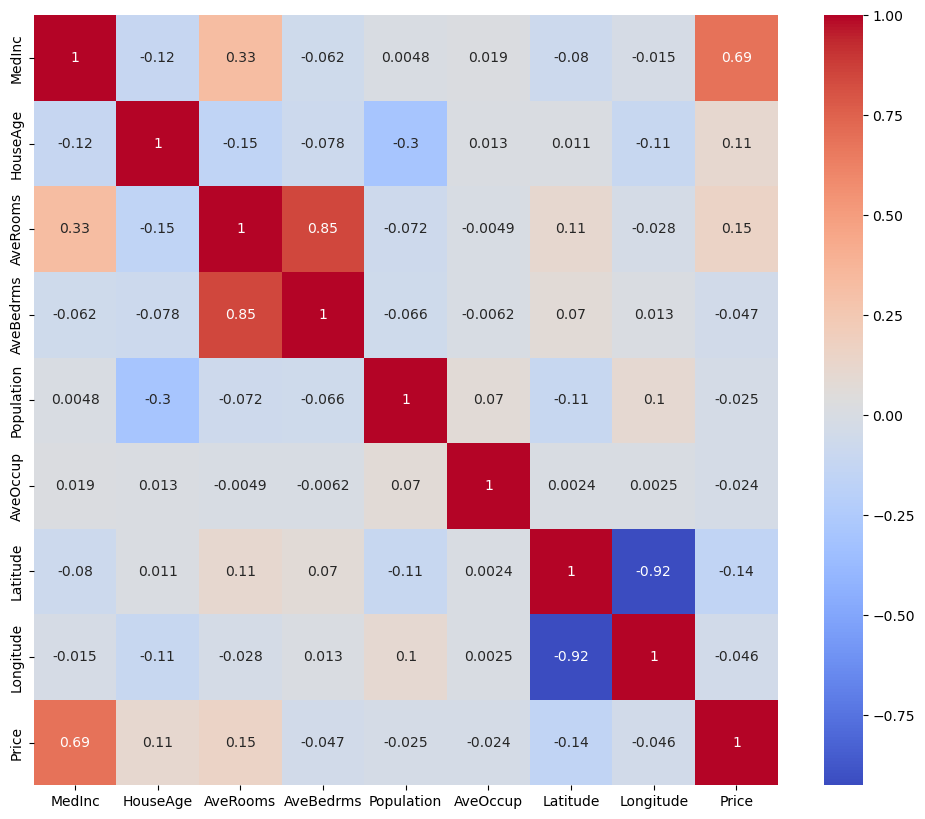

In [53]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

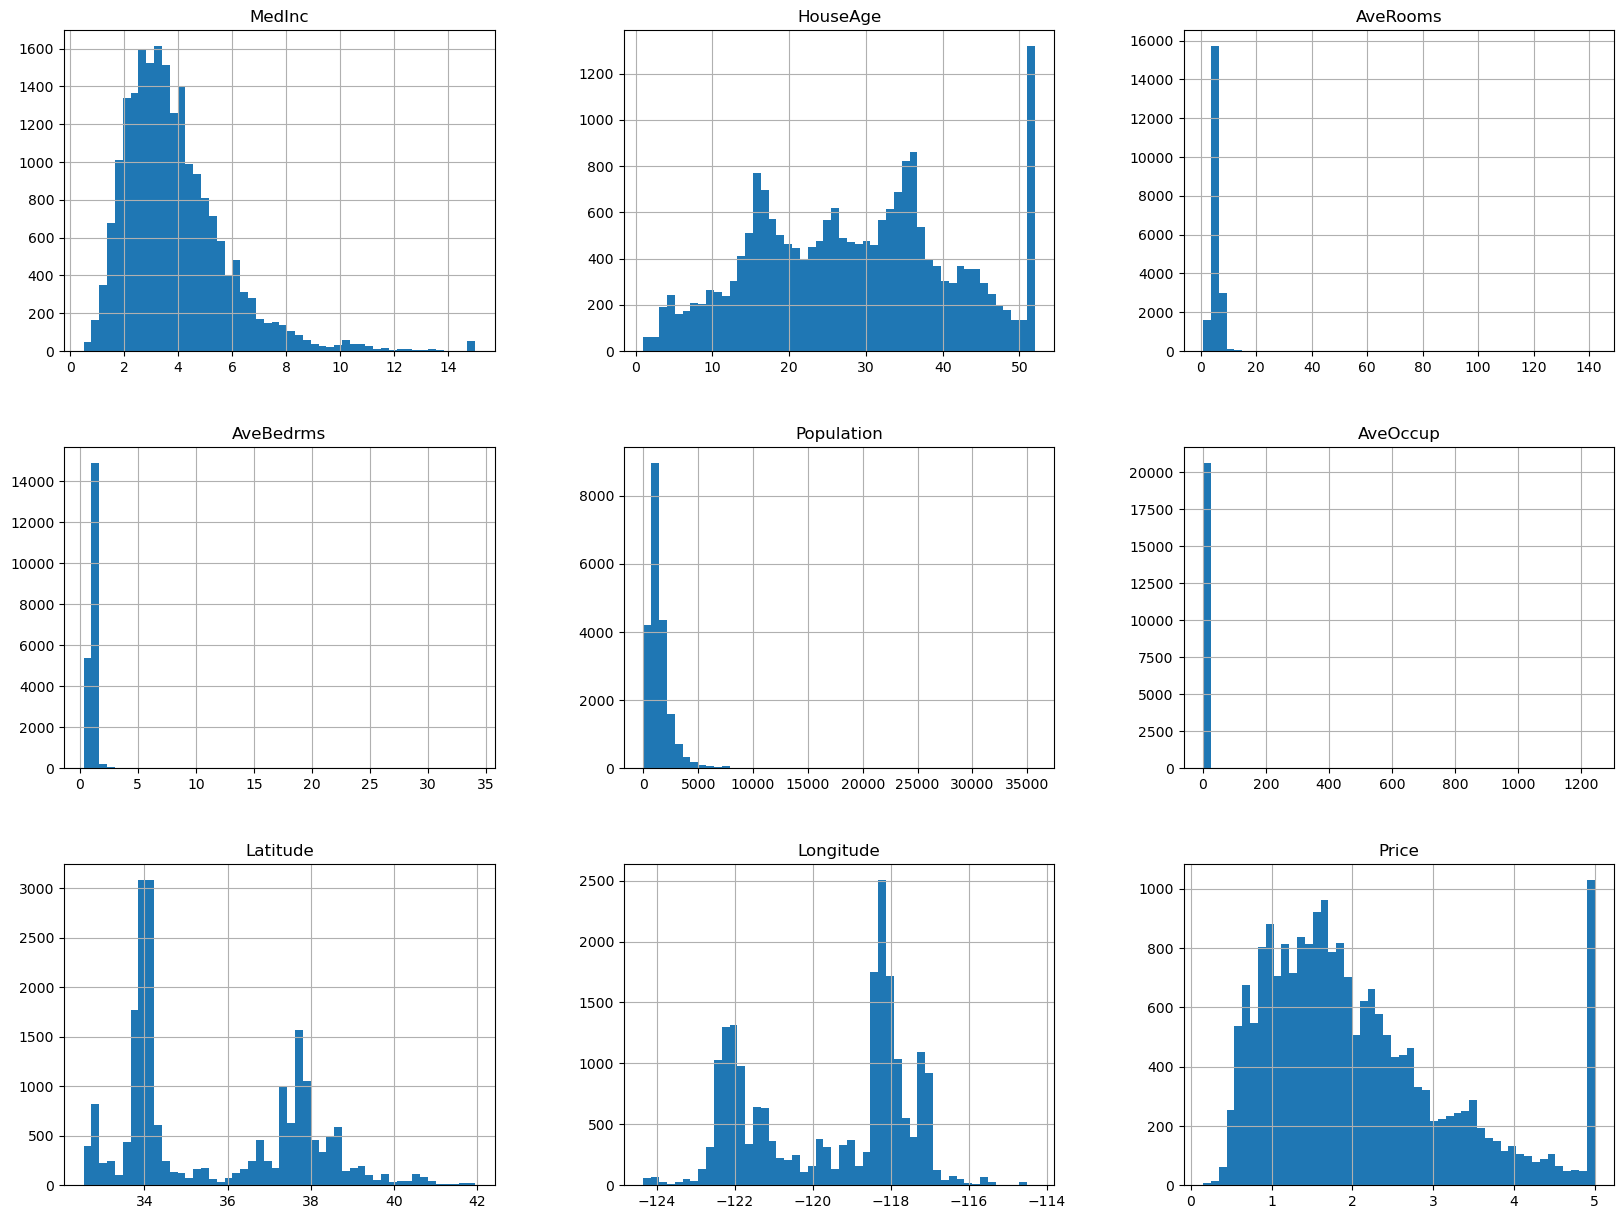

In [44]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [70]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [73]:
x.head

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

In [72]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [77]:
#train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [81]:
print(x_train.shape)
print(x_test.shape)

(16512, 8)
(4128, 8)


In [82]:
print(y_train.shape)
print(y_test.shape)

(16512,)
(4128,)


In [83]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1032,3.1250,23.0,6.375796,1.242038,369.0,2.350318,38.51,-120.80
10807,4.4211,35.0,5.305970,1.027363,1473.0,3.664179,33.65,-117.93
87,0.7600,10.0,2.651515,1.054545,546.0,1.654545,37.81,-122.27
4395,2.6178,52.0,3.304290,1.036193,2328.0,3.120643,34.08,-118.28
19053,3.2937,33.0,5.317647,1.067647,824.0,2.423529,38.16,-121.69
...,...,...,...,...,...,...,...,...
19527,2.7917,41.0,4.732258,1.058065,673.0,2.170968,37.64,-120.96
20414,3.5504,11.0,4.302564,1.065934,3089.0,2.263004,34.18,-118.85
9526,1.7813,33.0,4.356436,1.000000,1048.0,3.458746,39.13,-123.16
9771,3.3289,39.0,5.580488,1.290244,1449.0,3.534146,36.38,-121.40


In [84]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20038,1.5506,24.0,4.845921,1.043807,1986.0,3.000000,36.05,-119.00
17684,2.3971,17.0,4.654867,1.055310,1476.0,1.632743,37.28,-121.85
9720,4.6125,16.0,6.109091,1.036364,1103.0,4.010909,36.90,-121.71
17295,9.0267,16.0,8.569132,1.257235,794.0,2.553055,34.43,-119.61
18736,3.7896,18.0,5.936031,1.010444,2269.0,2.962141,40.52,-122.37
...,...,...,...,...,...,...,...,...
7573,3.1189,43.0,5.055866,0.997207,1335.0,3.729050,33.90,-118.21
11436,5.7395,24.0,6.266854,0.967697,1943.0,2.728933,33.65,-117.96
16564,4.3229,18.0,5.398601,0.951049,825.0,2.884615,37.75,-121.52
5083,1.3479,42.0,3.907586,1.059310,2542.0,3.506207,33.98,-118.29


In [94]:
#pre-processing
#standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [101]:
x_train=scaler.fit_transform(x_train)

In [100]:
x_test=scaler.transform(x_test)

In [102]:
x_train

array([[-0.39391792, -0.44773646,  0.36625186, ..., -0.14324829,
         1.34571519, -0.61053778],
       [ 0.29244492,  0.50551543, -0.04889613, ...,  0.15117139,
        -0.93015644,  0.82224293],
       [-1.64632756, -1.48042601, -1.07896236, ..., -0.2991623 ,
         1.01791475, -1.34440107],
       ...,
       [-1.10548783,  0.34664011, -0.41736477, ...,  0.10513638,
         1.63605272, -1.78871286],
       [-0.28594062,  0.82326606,  0.05763096, ...,  0.12203268,
         0.34826528, -0.91007382],
       [ 0.49309524,  0.42607777, -0.08075114, ...,  0.13612074,
        -0.87864494,  0.842212  ]])

In [103]:
x_test

array([[-1.22765735, -0.36829881, -0.22741889, ...,  0.00233719,
         0.19373079,  0.28807033],
       [-0.77938472, -0.92436241, -0.30155783, ..., -0.30404787,
         0.76972299, -1.13472585],
       [ 0.39380272, -1.00380007,  0.26275638, ...,  0.22886923,
         0.59177418, -1.0648341 ],
       ...,
       [ 0.24044212, -0.84492475, -0.0129504 , ..., -0.02351906,
         0.98981757, -0.96998102],
       [-1.33499918,  1.06157903, -0.59154164, ...,  0.1157718 ,
        -0.77562194,  0.64252131],
       [ 0.16212018,  0.50551543, -0.00444105, ..., -0.00656695,
        -0.64450177,  0.56264503]])

In [104]:
#Model training
#using Linear regression

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [108]:
model.coef_

array([ 8.20633092e-01,  1.16364953e-01, -2.65330511e-01,  3.03167409e-01,
        4.45708740e-04, -3.81627976e-02, -9.13686448e-01, -8.81843699e-01])

In [109]:
model.intercept_

2.068191643653104

In [111]:
#info on which parameters model is trained
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [113]:
# Making predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


In [124]:
# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Print residuals
print("Train Residuals:\n", train_residuals)
print("Test Residuals:\n", test_residuals)

Train Residuals:
 1032    -0.032330
10807   -0.303918
87       0.553911
4395     0.015075
19053   -0.742636
           ...   
19527   -0.613119
20414   -0.435215
9526    -0.383782
9771    -0.603702
10967   -0.638922
Name: Price, Length: 16512, dtype: float64
Test Residuals:
 20038   -0.091169
17684   -0.808857
9720    -0.018646
17295    0.500045
18736    0.010227
           ...   
7573    -0.799161
11436    0.084463
16564    1.239998
5083    -0.367469
3506    -0.194325
Name: Price, Length: 4128, dtype: float64


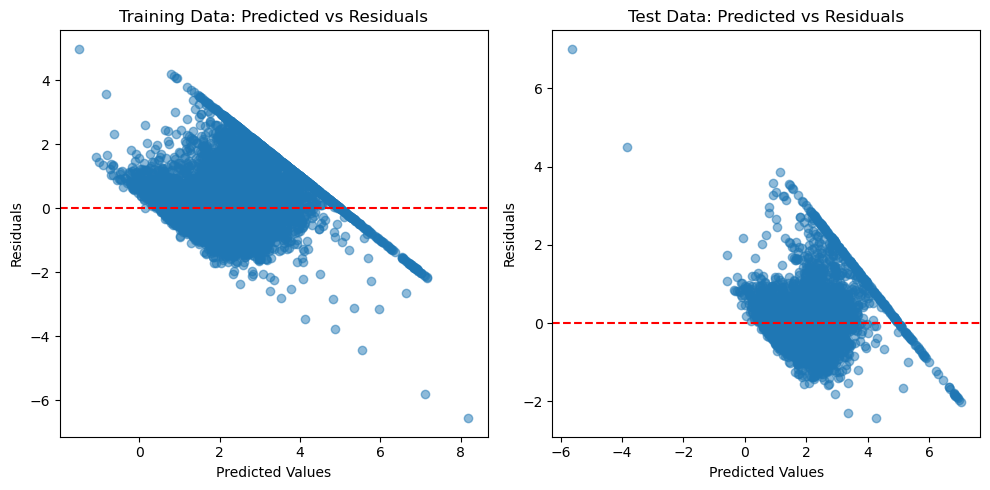

In [127]:
#Ploting Residuals for Training Data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Training Data: Predicted vs Residuals')


#Ploting Residuals for Test Data
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test Data: Predicted vs Residuals')

plt.tight_layout()
plt.show()

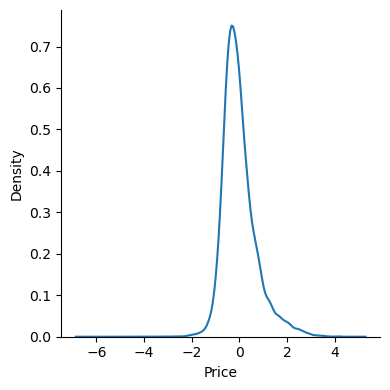

In [139]:
sns.displot(train_residuals, kind="kde", height=4, aspect=1)


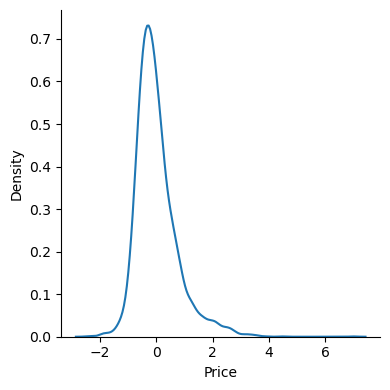

In [140]:
sns.displot(test_residuals, kind="kde", height=4, aspect=1)

In [153]:
# Evaluate the model
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [152]:
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

In [151]:
# Print metrics
print(f'Test Mean Sq Error: {test_mse:.2f}')
print(f'Test Mean Absolute Error: {test_mae:.2f}')

Test Mean Sq Error: 0.56
Test Mean Absolute Error: 0.54


In [156]:
#Code to Calculate and Print R² and Adjusted R²

from sklearn.metrics import r2_score

# Calculate R² score
test_r2 = r2_score(y_test, y_test_pred)

# Calculate Adjusted R² score
n = len(y_test)  # Number of observations
p = x_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - test_r2) * (n - 1) / (n - p - 1)

In [158]:
# Print metrics
print(f'Test R²: {test_r2:.2f}')
print(f'Adjusted R²: {adjusted_r2:.2f}')

Test R²: 0.59
Adjusted R²: 0.59


In [169]:
#new data prediction
new_data = pd.DataFrame([x.iloc[0].values], columns=x.columns)

In [175]:
# Transform the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions with the trained model
model.predict(new_data_scaled)

array([4.12524183])

In [176]:
prediction=model.predict(new_data_scaled)
print('Prediction for new data:\n',prediction)

Prediction for new data:
 [4.12524183]


In [177]:
#pickling the model for deployment

In [179]:
import pickle

# Save the model to a file
with open('regmodel.pkl', 'wb') as file:
    pickle.dump(model, file)


In [180]:
# Load the model from the file
with open('regmodel.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully.")

Model loaded successfully.


In [181]:
loaded_model.predict(new_data_scaled)

array([4.12524183])